# Descriptive Statistics

statistik yang digunakan untuk mendeskripsikan data, merangkum data

- central tendency: mean, median, mode
- variability: std deviation, variance, range, IQR
- distribution: normal, probability distribution


In [42]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df_student = pd.read_csv("dataset/StudentsPerformance.csv")
df_student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df_sleep = pd.read_csv("dataset/sleep_dat.csv")
df_sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## Central Tendency


In [23]:
# pandas dataframe describe
summary_student1 = df_student.describe()
summary_student1

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [31]:
summary_student1.loc['75%', 'math score']

77.0

untuk pandas describe, kita bisa dapat angka:

- count
- mean, median (50%)
- std, Q1, Q2, Q3 (untuk hitung IQR), min, max (untuk hitung range)

untuk scipy stats describe, kita bisa dapat angka:

- nobs (count),
- minmax (untuk hitung range),
- mean
- variance (cari std)
- skewness, kurtosis (cek normality)


In [15]:
# scipy stats
# tidak otomatis filter numeric data only
summary_student = stats.describe(
    df_student[['math score', 'reading score', 'writing score']])
summary_student

DescribeResult(nobs=1000, minmax=(array([ 0, 17, 10], dtype=int64), array([100, 100, 100], dtype=int64)), mean=array([66.089, 69.169, 68.054]), variance=array([229.918998  , 213.1656046 , 230.90799199]), skewness=array([-0.27851657, -0.2587157 , -0.28900962]), kurtosis=array([ 0.26759715, -0.07391861, -0.03919203]))

In [ ]:
summary_student.nobs  # number of objects, ada berapa banyak data

1000

In [17]:
summary_student.minmax

(array([ 0, 17, 10], dtype=int64), array([100, 100, 100], dtype=int64))

selain describe, scipy stats juga punya fungsi untuk hitung iqr


In [22]:
stats.iqr(df_student['writing score'])

21.25

In [35]:
# std deviation
np.sqrt(summary_student.variance[0])

15.163080096009452

In [37]:
summary_student1.loc['std', 'math score']

15.163080096009468

In [8]:
# mean
df_student['math score'].mean()

66.089

In [ ]:
# median, datanya 1D, 1 kolom, lalu kita gunakan built in dataframe function median()
df_student['math score'].median()

66.0

In [9]:
# mode
df_student['math score'].mode()

0    65
Name: math score, dtype: int64

mode biasanya untuk data discrete


sejauh ini kita sudah bisa hitung angka2 central tendency dan variability

- mean median mode
- std deviation, variance, range, iqr

terakhir kita bahas distribution

- histogram
- boxplot


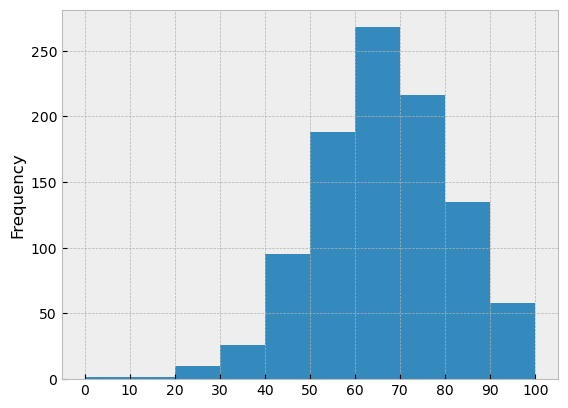

In [ ]:
# contoh: data math score
dmath = df_student['math score']

# pilih jumlah bins, siapkan bin edges
b = 10
freq, bin_edges = np.histogram(dmath, bins=b)

# pilih plot style, optional
plt.style.use('bmh')

# bikin plot
dmath.plot(kind="hist", bins=b)
plt.xticks(bin_edges)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


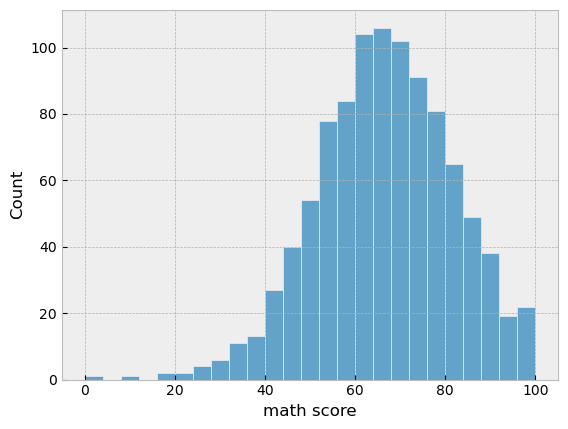

In [45]:
sns.histplot(dmath)
plt.show()

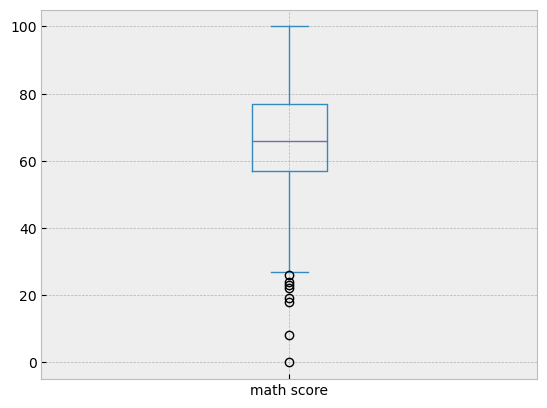

In [47]:
dmath.plot(kind="box")
plt.show()

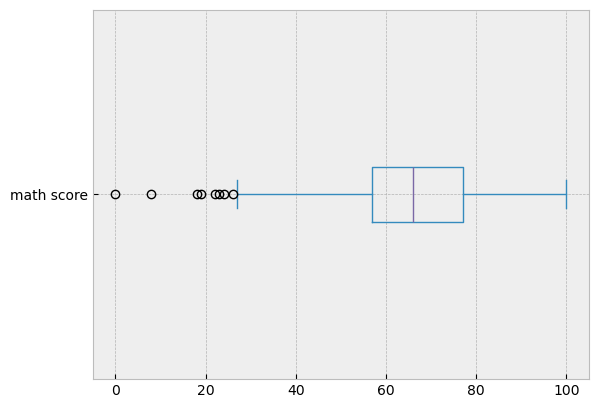

In [51]:
dmath.plot(kind="box", vert=False)
# dmath.plot(kind="box", orientation="vertical") # package pandas versi baru
plt.show()

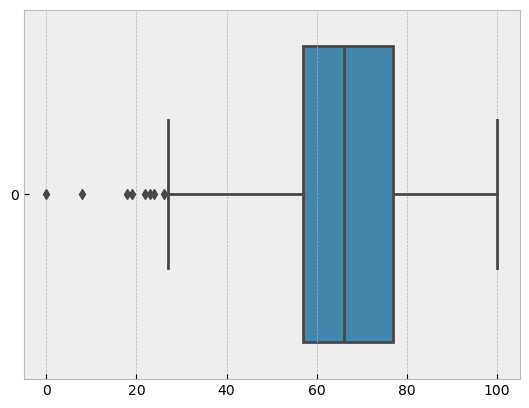

In [54]:
sns.boxplot(dmath, orient='h')
plt.show()

Untuk mencari "central tendency" dan "variability" kita bisa gunakan built-in function dari pandas atau function dari scipy.stats untuk mendapat angka2 tersebut.

Untuk melihat jenis distribusi dan ada/tidak outlier, kita bisa gunakan pandas dan pyplot, atau seaborn, untuk membuat grafik histogram dan boxplot.

Berikutnya kita coba lihat hasil histogram dan box plot untuk jenis data lainnya


In [57]:
# tipe data discrete
dsleep_quality = df_sleep['Quality of Sleep']
dsleep_quality

0      6
1      6
2      6
3      4
4      4
      ..
369    9
370    9
371    9
372    9
373    9
Name: Quality of Sleep, Length: 374, dtype: int64

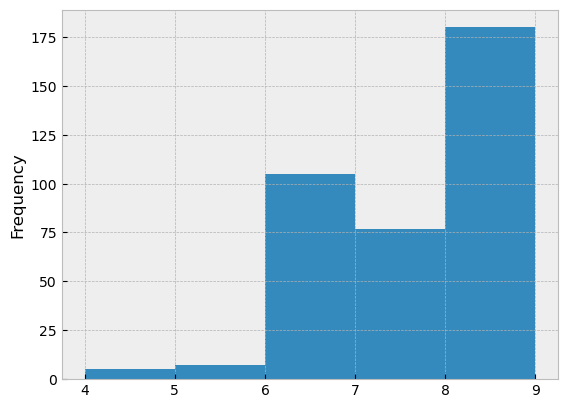

In [60]:
# pilih jumlah bins, siapkan bin edges
b = 5
freq, bin_edges = np.histogram(dsleep_quality, bins=b)

# bikin plot
dsleep_quality.plot(kind="hist", bins=b)
plt.xticks(bin_edges)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


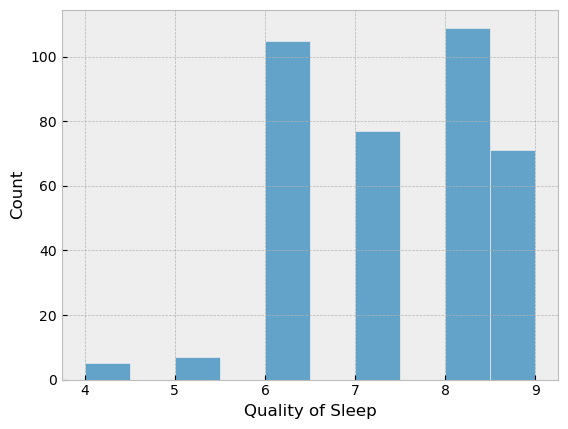

In [62]:
sns.histplot(dsleep_quality)
plt.show()

# Outlier

kita bisa hitung menggunakan IQR dan Tukey's rule mana data yang kita anggap outlier


In [63]:
dmath

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [64]:
# cari IQR
# Q3 - Q1
Q1 = dmath.quantile(0.25)
Q3 = dmath.quantile(0.75)

IQR = Q3 - Q1
print("IQR", IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
print("upper lower bounds", upper, lower)

IQR 20.0
upper lower bounds 107.0 27.0


In [69]:
# filter outliers
k1 = (dmath >= lower)
k2 = (dmath <= upper)

filtered_dmath = dmath[k1 & k2]
filtered_dmath

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 992, dtype: int64

# Latihan

Gunakan data dari [link kaggle](https://www.kaggle.com/datasets/grubenm/austin-weather) dataset/austin_weather.csv untuk latihan

Cobalah cari:

- mean, median, mode
- std deviation, variance, range, IQR
- distribution (histogram, boxplot)

Extra:

- gunakan tukey's rule untuk filter outlier
